In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
main_df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=2325&path=adult-census-income.csv')

In [127]:
main_df.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [128]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [129]:
# coming back up here to drop things they can't change to see if that makes that big of a difference
main_df.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [130]:
main_df.drop(columns=(['marital.status', 'race', 'sex', 'native.country', 'age']), inplace=True)

In [131]:
cols = main_df.columns

In [132]:
type(cols)

pandas.Index

In [133]:
cols = list(cols)

In [134]:
def find_na(columns):
    main_df[cols].isna().sum()

In [135]:
print(find_na(cols))

None


In [136]:
main_df.describe()

,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [137]:
main_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   workclass       32561 non-null  str  
 1   fnlwgt          32561 non-null  int64
 2   education       32561 non-null  str  
 3   education.num   32561 non-null  int64
 4   occupation      32561 non-null  str  
 5   relationship    32561 non-null  str  
 6   capital.gain    32561 non-null  int64
 7   capital.loss    32561 non-null  int64
 8   hours.per.week  32561 non-null  int64
 9   income          32561 non-null  str  
dtypes: int64(5), str(5)
memory usage: 2.5 MB


In [138]:
main_df.head(1)

,workclass,fnlwgt,education,education.num,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,?,77053,HS-grad,9,?,Not-in-family,0,4356,40,<=50K


In [139]:
print(f"Column 'workclass' unique values: {main_df['workclass'].unique()}")
print(f"Column 'fnlwgt' unique values: {main_df['fnlwgt'].unique()}")
print(f"Column 'education' unique values: {main_df['education'].unique()}")
print(f"Column 'education.num' unique values: {main_df['education.num'].unique()}")
print(f"Column 'occupation' unique values: {main_df['occupation'].unique()}")
print(f"Column 'capital.gain' unique values: {main_df['capital.gain'].unique()}")
print(f"Column 'capital.loss' unique values: {main_df['capital.loss'].unique()}")
print(f"Column 'hours.per.week' unique values: {main_df['hours.per.week'].unique()}")
print(f"Column 'income' unique values: {main_df['income'].unique()}")

Column 'workclass' unique values: <StringArray>
[               '?',          'Private',        'State-gov',
      'Federal-gov', 'Self-emp-not-inc',     'Self-emp-inc',
        'Local-gov',      'Without-pay',     'Never-worked']
Length: 9, dtype: str
Column 'fnlwgt' unique values: [ 77053 132870 186061 ...  34066  84661 257302]
Column 'education' unique values: <StringArray>
[     'HS-grad', 'Some-college',      '7th-8th',         '10th',
    'Doctorate',  'Prof-school',    'Bachelors',      'Masters',
         '11th',   'Assoc-acdm',    'Assoc-voc',      '1st-4th',
      '5th-6th',         '12th',          '9th',    'Preschool']
Length: 16, dtype: str
Column 'education.num' unique values: [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Column 'occupation' unique values: <StringArray>
[                '?',   'Exec-managerial', 'Machine-op-inspct',
    'Prof-specialty',     'Other-service',      'Adm-clerical',
      'Craft-repair',  'Transport-moving', 'Handlers-cleaners',
        

In [140]:
# columns with '?': workclass, occupation, native.country

In [141]:
main_df[main_df['workclass'] == '?'].count()

workclass         1836
fnlwgt            1836
education         1836
education.num     1836
occupation        1836
relationship      1836
capital.gain      1836
capital.loss      1836
hours.per.week    1836
income            1836
dtype: int64

In [142]:
main_df['workclass'] = main_df['workclass'].replace('?', np.nan)

In [143]:
main_df['workclass'].isna().sum()

np.int64(1836)

In [144]:
main_df['occupation'] = main_df['occupation'].replace('?', np.nan)
main_df['occupation'].isna().sum()

np.int64(1843)

In [145]:
main_df.shape

(32561, 10)

# NA overlap analysis

In [146]:
print(main_df.isna().sum().sum())
print(main_df.shape[0])

3679
32561


In [147]:
print((main_df.isna().sum().sum()) / main_df.shape[0])

0.11298793034611959


In [148]:
def na_overlap_matrix(df):
    na_df = df.isna().astype(int)
    overlap = na_df.T @ na_df
    return overlap

In [149]:
na_overlap_matrix(main_df)

,workclass,fnlwgt,education,education.num,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
workclass,1836,0,0,0,1836,0,0,0,0,0
fnlwgt,0,0,0,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,0,0
education.num,0,0,0,0,0,0,0,0,0,0
occupation,1836,0,0,0,1843,0,0,0,0,0
relationship,0,0,0,0,0,0,0,0,0,0
capital.gain,0,0,0,0,0,0,0,0,0,0
capital.loss,0,0,0,0,0,0,0,0,0,0
hours.per.week,0,0,0,0,0,0,0,0,0,0
income,0,0,0,0,0,0,0,0,0,0


In [150]:
main_df.head(5)

,workclass,fnlwgt,education,education.num,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,NaN,77053,HS-grad,9,NaN,Not-in-family,0,4356,40,<=50K
1,Private,132870,HS-grad,9,Exec-managerial,Not-in-family,0,4356,18,<=50K
2,NaN,186061,Some-college,10,NaN,Unmarried,0,4356,40,<=50K
3,Private,140359,7th-8th,4,Machine-op-inspct,Unmarried,0,3900,40,<=50K
4,Private,264663,Some-college,10,Prof-specialty,Own-child,0,3900,40,<=50K


In [151]:
# looks like these are redundant columns, dropping cat
main_df[['education', 'education.num']].head(10)

,education,education.num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
7,Doctorate,16
8,HS-grad,9
9,Some-college,10


In [152]:
main_df.drop(columns='education', inplace=True)

In [153]:
main_df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [154]:
# update our target variable to binary; if <=50k then 0, if >50k then 1
main_df['income'] = main_df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [155]:
main_df['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [156]:
# separate our columns
numeric_cols = main_df.select_dtypes(include=['number']).columns.tolist()

# Separate categorical (non-numeric) columns
categorical_cols = main_df.select_dtypes(exclude=['number']).columns.tolist()

print(numeric_cols)

print(categorical_cols)

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
['workclass', 'occupation', 'relationship']


Initial H1, there is a relationship between feature 'workclass' and our target 'income'

In [157]:
from scipy.stats import chi2_contingency

target = main_df['income']

def chi_square_test(df, feature, target):
    table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    return {"feature": feature, "chi2": chi2, "p_value": p}

In [158]:
# chi sq -> very large, indicates a strong relationship between workclass and our target
# p_value is almost 0 -> extremely unlikely this is due to chance. reject H0 (no relationship between the two)
chi_square_test(main_df, 'workclass', 'income')

{'feature': 'workclass',
 'chi2': np.float64(827.7183593884149),
 'p_value': np.float64(1.9338476684848218e-174)}

In [159]:
# these values from chi sq stay the same, it drops na's prior to testing
main_df = main_df.dropna()

In [160]:
main_df.head(1)

,workclass,fnlwgt,education.num,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
1,Private,132870,9,Exec-managerial,Not-in-family,0,4356,18,0


second H1 -> There is a relationship between feature 'education.num' and our target 'income'

In [161]:
# want to look at numerical data against binary income target
# moderate positive correlation between the two, p_value < 1e^-16 = highly unlikely due to chance, good
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(main_df['income'], main_df['education.num'])
print(corr, p_value)

0.33464033101550883 0.0


In [162]:
# normalize numerical data
main_df[numeric_cols].head(1)

,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
1,132870,9,0,4356,18,0


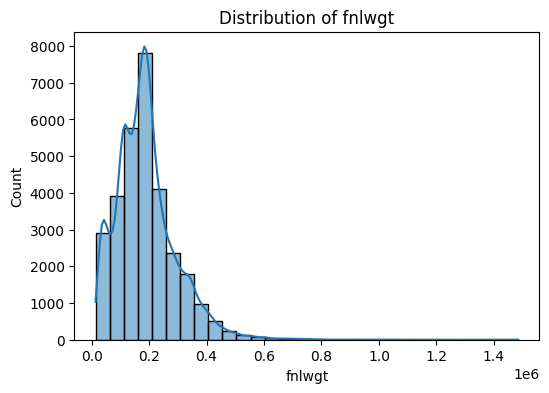

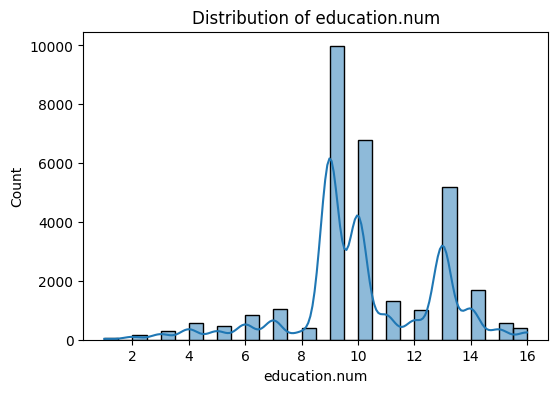

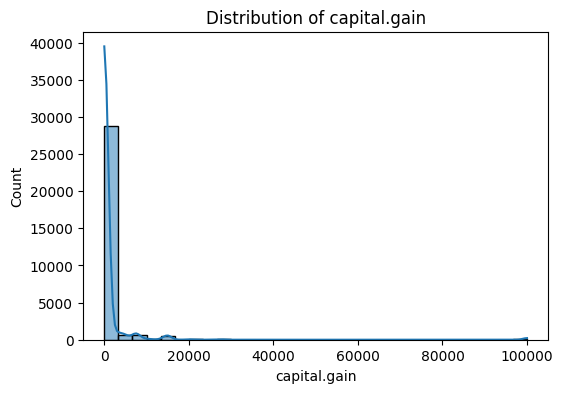

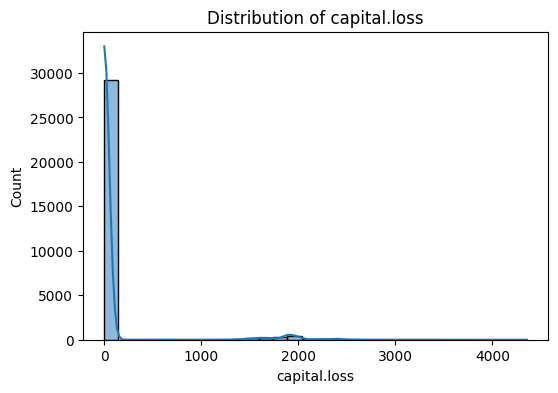

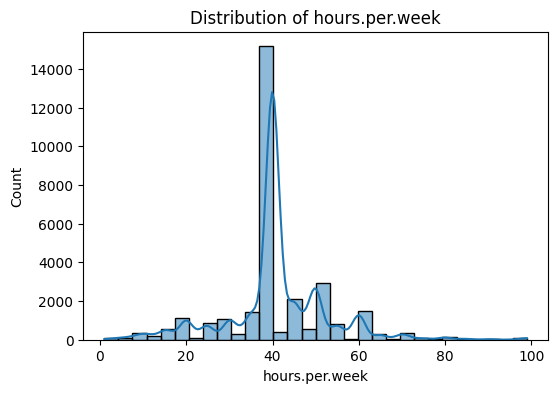

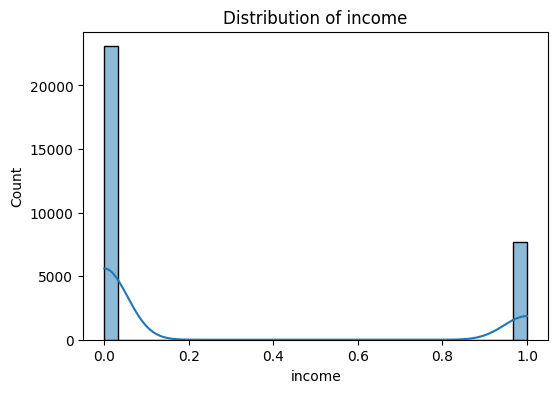

In [163]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(main_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [164]:
main_df['income'].value_counts()

income
0    23068
1     7650
Name: count, dtype: int64

In [165]:
# normalize these for content-based featuring
# train test split
from sklearn.model_selection import train_test_split

X = main_df.drop(columns='income')
y = main_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [166]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

C:\Users\caleb\AppData\Local\Temp\ipykernel_29392\573071709.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns


In [167]:
print(numeric_cols)
print(categorical_cols)

Index(['fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='str')
Index(['workclass', 'occupation', 'relationship'], dtype='str')


In [168]:
main_df.shape

(30718, 9)

In [169]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

In [170]:
X_train_encoded.head(1)

,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
22832,320071,9,0,0,40,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [171]:
X_test_encoded.head(1)

,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
6887,337639,10,0,0,40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [172]:
# align in case dummy vars didn't line up 
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [173]:
# scale independantly 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])

In [174]:
# normalize
from sklearn.preprocessing import normalize

X_train_final = normalize(X_train_encoded.values)
X_test_final = normalize(X_test_encoded.values)

In [175]:

from sklearn.metrics.pairwise import cosine_similarity

user_similarity_train = cosine_similarity(X_train_final)

In [176]:
user_similarity_test = cosine_similarity(X_test_final, X_train_final)

In [177]:
user_similarity_test

array([[ 3.72246874e-01,  4.71016891e-01, -1.14524013e-01, ...,
        -1.04074352e-01,  3.28836398e-01,  3.14015528e-01],
       [ 1.39429007e-01,  3.28033986e-01, -3.31463109e-01, ...,
         2.11752360e-02,  3.40629478e-01, -5.38538527e-02],
       [ 4.82985467e-01,  5.48194144e-01, -3.57236595e-01, ...,
         2.49166115e-01, -2.54414497e-01, -5.03937409e-01],
       ...,
       [ 4.52289674e-03,  3.21705040e-01, -1.80681844e-01, ...,
         7.11494766e-02,  1.30714125e-01,  7.26975525e-02],
       [-1.23693616e-01, -1.06909967e-01, -1.05346471e-01, ...,
         6.56911904e-01,  8.99645419e-02, -9.58560306e-02],
       [-3.01187818e-01,  1.86964263e-04,  3.14718053e-01, ...,
         4.33570220e-02,  6.27209688e-01,  2.53077020e-01]],
      shape=(6144, 24574))

<Axes: >

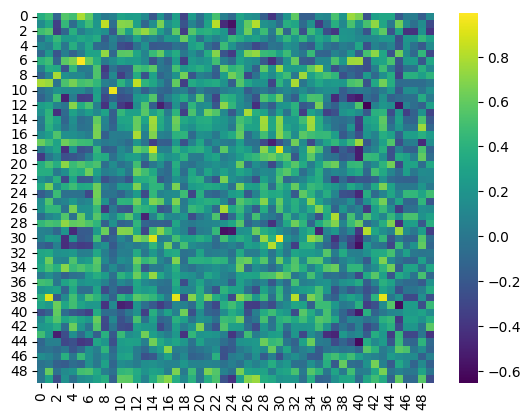

In [178]:
sns.heatmap(user_similarity_test[:50, :50], cmap='viridis')

In [179]:
# separate the high income vs low income user s
high_income_users = X_train_final[np.array(y_train) == 1]
low_income_users = X_train_final[np.array(y_train) == 0]

In [180]:
test_user = X_test_final[0].reshape(1, -1)
similarities = cosine_similarity(test_user, high_income_users)
top3_idx = similarities.argsort()[0][-3:]

In [181]:
main_df[main_df.index.isin(top3_idx)]

,workclass,fnlwgt,education.num,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
2273,State-gov,287988,13,Prof-specialty,Not-in-family,10520,0,40,1
3917,Private,156310,6,Other-service,Husband,2414,0,12,0
4156,Private,103851,7,Adm-clerical,Own-child,1055,0,20,0


In [182]:
high_income_df = X_train_encoded[np.array(y_train) == 1]
top3_users = high_income_df.iloc[top3_idx]  

In [183]:
# need these as dataframes
X_train_normalized = pd.DataFrame(
    normalize(X_train_encoded.values),
    columns=X_train_encoded.columns,
    index=X_train_encoded.index
)

In [184]:
X_test_normalized = pd.DataFrame(
    normalize(X_test_encoded.values),
    columns=X_test_encoded.columns,
    index=X_test_encoded.index
)

In [185]:
test_user = X_test_normalized.iloc[0:1]

In [186]:
# similarity to all high-income users
similarities = cosine_similarity(test_user.values, high_income_df.values)

# indices of top-3 most similar high-income users
top3_idx = similarities.argsort()[0][-3:]
top3_users = high_income_df.iloc[top3_idx]

In [187]:
# compute the average difference between top-3 high-income peers and the test user
diffs = top3_users.mean() - test_user.iloc[0]

# keep only positive differences (things the user could “increase” to become more like high earners)
recommendations = diffs[diffs > 0].sort_values(ascending=False)

In [188]:
# some of these things they can't change
recommendations

fnlwgt                  1.174268
relationship_Husband    1.000000
workclass_Private       0.554716
occupation_Sales        0.554716
dtype: float64

In [189]:
# rec system, decided to comapre against the top 3 "most similar" users who are high income
def actionable_recommendations(test_user_vector, high_income_df, 
                               numeric_features, categorical_features,
                               immutable_features=None, n_top=3):
    
    if immutable_features is None:
        immutable_features = []

    # compute similarity to high income users
    sims = cosine_similarity(test_user_vector.values, high_income_df.values)
    top_idx = sims.argsort()[0][-n_top:]
    
    # select top (n) high-income peers
    top_users = high_income_df.iloc[top_idx]
    
    # compute average difference
    diffs = top_users.mean() - test_user_vector.iloc[0]
    
    # keep only positive differences (things the user could increase)
    diffs = diffs[diffs > 0]
    
    # remove immutable features
    actionable_diffs = diffs.drop(labels=immutable_features, errors='ignore')
    
    # separate numeric vs categorical for interpretation (future thing I could for interpretability?)
    actionable_numeric = actionable_diffs[actionable_diffs.index.isin(numeric_features)]
    actionable_categorical = actionable_diffs[actionable_diffs.index.isin(categorical_features)]
    
    return pd.concat([actionable_numeric, actionable_categorical]).sort_values(ascending=False)

In [190]:
# define immutable features and which columns are numeric vs categorical
immutable_features = ['age', 'sex_Male', 'race_White', 'native.country_United-States', 
                      'relationship_Husband', 'fnlwgt', 'marital.status'] # don't think marital status is something we should pushing XD
numeric_features = ['education-num', 'hours-per-week', 'capital-gain', 'capital-loss']
categorical_features = [col for col in X_train_normalized.columns if col not in numeric_features]

# pick a low-income test user
test_user = X_test_normalized.iloc[0:1]

# generate actionable recommendations :)
recs = actionable_recommendations(test_user, high_income_df,
                                  numeric_features, categorical_features,
                                  immutable_features=immutable_features)
print(recs)

workclass_Private    0.554716
occupation_Sales     0.554716
dtype: float64


In [191]:
main_df.head(1)

,workclass,fnlwgt,education.num,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
1,Private,132870,9,Exec-managerial,Not-in-family,0,4356,18,0


In [192]:
test_user = X_test_normalized.iloc[50:51]

recs = actionable_recommendations(test_user, high_income_df,
                                  numeric_features, categorical_features,
                                  immutable_features=immutable_features)
print(recs)

education.num                 0.710115
workclass_Private             0.519690
occupation_Exec-managerial    0.519690
relationship_Not-in-family    0.519690
hours.per.week                0.099811
dtype: float64


In [193]:
# I'm actually not a fan of the output, so, re-writting function with human readable and interpretable output

def actionable_recommendations_v2(test_user_vector, test_user_income, high_income_df, 
                                    numeric_features, categorical_features,
                                    immutable_features=None, n_top=3):

    if immutable_features is None:
        immutable_features = []

    # check if user is already high income, if they are, just return, 
    # we don't have anything to recommend if they're already a high earner
    if test_user_income == 1:
        return ["User already high income"]

    # compute similarity to high income users
    sims = cosine_similarity(test_user_vector.values, high_income_df.values)
    top_idx = sims.argsort()[0][-n_top:]
    
    # select top (n) high income peers
    top_users = high_income_df.iloc[top_idx]
    
    # compute average difference between top peers and the test user
    diffs = top_users.mean() - test_user_vector.iloc[0]
    
    # keep only positive differences
    diffs = diffs[diffs > 0]
    
    # remove immutable features
    diffs = diffs.drop(labels=immutable_features, errors='ignore')
    
    # separate numeric and categorical for human readable output
    actionable_numeric = diffs[diffs.index.isin(numeric_features)]
    actionable_categorical = diffs[diffs.index.isin(categorical_features)]
    
    # create human readable recommendations
    recommendations = []
    
    for feature, diff in actionable_numeric.items():
        recommendations.append(f"Increase {feature} by {diff:.1f}")
    
    for feature, diff in actionable_categorical.items():
        readable_feature = feature.replace('_', ' ').replace('-', ' ')
        recommendations.append(f"Consider {readable_feature} (strength {diff:.2f})")
    
    # sort the largest fixes first
    recommendations = sorted(recommendations, key=lambda x: float(x.split()[-1].replace(')', '')) if 'strength' in x else float(x.split()[-1]), reverse=True)
    
    return recommendations

In [194]:
test_idx = X_test_normalized.index[0]
test_user_vector = X_test_normalized.loc[test_idx: test_idx]
test_user_income = y_test.loc[test_idx]

recs = actionable_recommendations_v2(test_user_vector, test_user_income, high_income_df,
                                       numeric_features, categorical_features,
                                       immutable_features=immutable_features)
for r in recs:
    print(r)

Consider workclass Private (strength 0.55)
Consider occupation Sales (strength 0.55)


In [195]:
# eh, a little more understandable, language would change for each category I suppose, possible future enhancement